#  Machine learning project notebook

### Student: G00219132 Susan Hudson - Module: Machine Learning & Statistics, GMIT

In [1]:
import datetime
print('\n'*2)
print ('**************************************************')
print ("Run date and time: " ,datetime.datetime.now().strftime("Date: %d-%m-%y    Time: %H-%M"))
print ('**************************************************')
print()
print()




**************************************************
Run date and time:  Date: 27-11-19    Time: 09-50
**************************************************




In [2]:
#command below ensures plots display correctly in the notebook

#below imports all necessary python packages for this notebook
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 6]
%matplotlib inline
import seaborn as sns
import pandas as pd
import scipy.stats as ss
import numpy as np
import sklearn.datasets
import seaborn as sns
import keras as kr

Using TensorFlow backend.


## Import dataset and Descriptive Statistics

In [3]:
# dataset is imported and converted to a pandas dataframe
sklearn.datasets.load_boston
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

In [4]:
# check data set shape and print first five rows
print(boston.data.shape)
df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

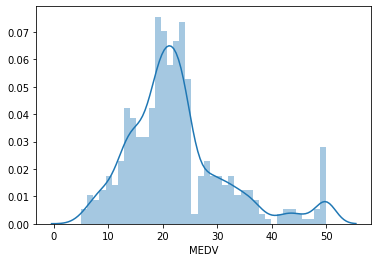

In [7]:
sns.distplot(df["MEDV"], bins=40)
plt.show()


Plot of Median Value shows a mainly mormal distribution.

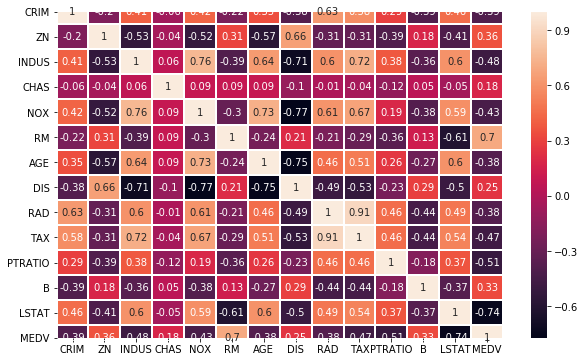

In [8]:
# correlation heatmap
correlation_heatmap = df.corr().round(2)

#ax.set_ylim(len(df)-.5 ,-.5)
fig, ax = plt.subplots(figsize=(10,6))   
#ax.set_ylim(len(df)-.5 ,-.5)
sns.heatmap(correlation_heatmap, annot=True,linewidths= 1, ax=ax)

plt.show()

In [9]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


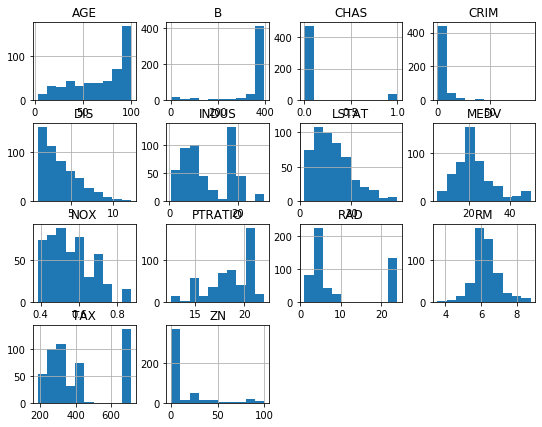

In [10]:
df.hist(bins=10, figsize=(9,7), grid=True)
plt.show()

//sns.set(style="ticks", color_codes=True)
//sns.pairplot(df)

In [11]:
# create two subsets to do a t test to see whether the mean of median values is the same for houses bordering the river 
# and houses not near the river. the hypothesis I am testing being that there is no difference in the average median value
# of properties based on riverside location.
# note: not really sure this is of any value as within each subset will be other variables that have a greater impact on price
# for example - number of rooms may be influencing price

dfnear =  df[(df['CHAS'] == 1.0)]
dfnear.reset_index(inplace= True)
#print(dfnear)


dffar =  df[(df['CHAS'] == 0.0)]
dffar.reset_index(inplace= True)
#print(dffar)

from scipy.stats import ttest_ind
n =dfnear['MEDV']
f =dffar['MEDV']
ss.ttest_ind(n,f)

# result obtained causes me to reject the hypothesis

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

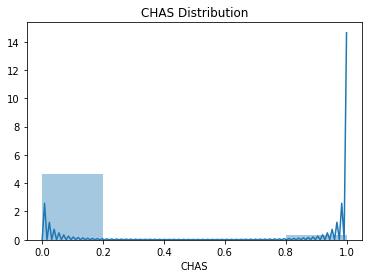

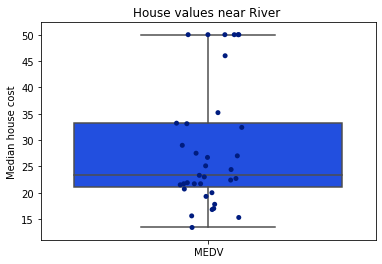

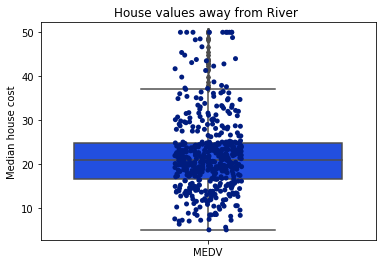

In [12]:
sns.distplot(df["CHAS"], bins=5).set_title ("CHAS Distribution")
plt.show()


df4 = pd.DataFrame(data = dfnear, columns = [ 'MEDV'] )
sns.boxplot(x="variable", y="value", data= pd.melt(df4), palette="bright").set_title("House values near River ")
sns.stripplot(x="variable", y="value", data= pd.melt(df4), palette="dark").set_title("House values near River ")
plt.ylabel('Median house cost')
plt.xlabel('')
plt.show()


df5 = pd.DataFrame(data = dffar, columns = [ 'MEDV'] )
sns.stripplot (x="variable", y="value", data= pd.melt(df5), palette="dark").set_title("House values away from River ")

sns.boxplot(x="variable", y="value", data= pd.melt(df5), palette="bright").set_title("House values away from River ")
plt.ylabel('Median house cost')
plt.xlabel('')
plt.show()

## predictive

Build a neural network using keras and splitting the data into train (80%) and test (20%)


In [13]:
# check data types
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [14]:
from sklearn.model_selection import train_test_split 
#dataset = df.values
#dataset =   df[(df['RM', 'ZN', 'PTRATIO', 'LSTAT','MEDV'])]
#print(dataset)
Y=df['MEDV']
print(Y)
X =df[['ZN','RM', 'LSTAT','PTRATIO' ]]

print(X)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64
       ZN     RM  LSTAT  PTRATIO
0    18.0  6.575   4.98     15.3
1     0.0  6.421   9.14     17.8
2     0.0  7.185   4.03     17.8
3     0.0  6.998   2.94     18.7
4     0.0  7.147   5.33     18.7
..    ...    ...    ...      ...
501   0.0  6.593   9.67     21.0
502   0.0  6.120   9.08     21.0
503   0.0  6.976   5.64     21.0
504   0.0  6.794   6.48     21.0
505   0.0  6.030   7.88     21.0

[506 rows x 4 columns]


In [15]:
X = df.iloc[:,0:13]
Y = df.iloc[:,13]
#Y
#Y=df['MEDV']
print(Y)
#X =df[['ZN','RM', 'LSTAT','PTRATIO' ]]
X

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


   ## Pre Processing of Data for Keras

### scaling

In [55]:
# scaling 
import sklearn.preprocessing as pre
xscale = pd.DataFrame(pre.scale(x), columns = x.columns)
xscale
yscale = pd.DataFrame(pre.scale(y))
yscale

C:\Users\shudson\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


,0
0,-0.818814
1,1.032803
2,0.425378
3,-0.511334
4,0.847119
...,...
399,0.724867
400,1.035724
401,-2.033286
402,-0.355014


### fitting and transforming

In [40]:
scaler=pre.StandardScaler()
scaler.fit(x)
x
scaler.mean_ , x.std()

(array([3.57175074e+00, 1.23118812e+01, 1.07656683e+01, 6.43564356e-02,
        5.53523762e-01, 6.29248762e+00, 6.88361386e+01, 3.83802450e+00,
        9.18069307e+00, 4.01012376e+02, 1.83948020e+01, 3.56777995e+02,
        1.26527475e+01]), CRIM         8.852954
 ZN          24.335114
 INDUS        6.752078
 CHAS         0.245691
 NOX          0.116421
 RM           0.734419
 AGE         27.869029
 DIS          2.156547
 RAD          8.521438
 TAX        164.448314
 PTRATIO      2.200202
 B           90.641644
 LSTAT        7.232645
 dtype: float64)

In [46]:
xscale = pd.DataFrame(scaler.transform(x), columns = x.columns)
xscale

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.059449,-0.506558,1.307044,-0.262265,2.730347,-1.124032,1.119612,-1.126446,-0.491217,0.012102,-1.681383,0.443193,1.905848
1,-0.394930,1.139195,-0.645885,-0.262265,-0.916121,0.258364,-1.319805,0.140340,-0.608714,-0.895082,-0.361688,0.443193,-0.756227
2,-0.394557,-0.506558,-1.231616,-0.262265,-0.563515,-0.938622,0.753161,-0.394695,-0.726210,-1.266479,-0.270675,0.378021,0.183736
3,-0.276541,-0.506558,1.307044,3.812933,2.730347,-1.745701,0.688493,-1.034333,-0.491217,0.012102,-1.681383,-0.149101,-0.073750
4,-0.394694,-0.506558,-1.167853,-0.262265,-0.933322,2.082472,-1.147357,-0.159166,-0.843707,-0.761135,-0.179661,0.405968,-1.257356
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.393490,0.727757,-0.865349,-0.262265,-1.079525,0.427414,-0.956946,1.091927,-0.373721,-0.615012,-0.816755,0.298268,-0.731309
400,-0.390288,-0.506558,-1.167853,-0.262265,-0.933322,2.421936,0.257373,-0.159166,-0.843707,-0.761135,-0.179661,0.443193,-1.168759
401,0.355799,-0.506558,1.087580,-0.262265,1.371521,0.622368,0.853755,-0.703116,1.741218,1.613371,0.821486,-3.937483,0.662716
402,-0.304287,-0.506558,1.649585,-0.262265,0.606107,-0.893632,0.929201,-0.862689,-0.608714,0.219110,1.276554,0.443193,0.787306


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_test)
print(X_test)

(404, 13)
(102, 13)
(404,)
(102,)
428    11.0
295    28.6
470    19.9
148    17.8
491    13.6
       ... 
337    18.5
288    22.3
12     21.7
460    16.4
191    30.5
Name: MEDV, Length: 102, dtype: float64
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
428  7.36711   0.0  18.10   0.0  0.679  6.193  78.1  1.9356  24.0  666.0   
295  0.12932   0.0  13.92   0.0  0.437  6.678  31.1  5.9604   4.0  289.0   
470  4.34879   0.0  18.10   0.0  0.580  6.167  84.0  3.0334  24.0  666.0   
148  2.33099   0.0  19.58   0.0  0.871  5.186  93.8  1.5296   5.0  403.0   
491  0.10574   0.0  27.74   0.0  0.609  5.983  98.8  1.8681   4.0  711.0   
..       ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
337  0.03041   0.0   5.19   0.0  0.515  5.895  59.6  5.6150   5.0  224.0   
288  0.04590  52.5   5.32   0.0  0.405  6.315  45.6  7.3172   6.0  293.0   
12   0.09378  12.5   7.87   0.0  0.524  5.889  39.0  5.4509   5.0  311.0   
460  4.81213   0.0  18.10   0.0  0

### whitening data

In [48]:
x.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.199793,0.416064,-0.064241,0.404242,-0.187329,0.348276,-0.369645,0.628409,0.588214,0.284885,-0.395621,0.402200
ZN,-0.199793,1.000000,-0.535832,-0.037397,-0.526882,0.282153,-0.593517,0.693422,-0.315696,-0.305507,-0.365619,0.182733,-0.407800
INDUS,0.416064,-0.535832,1.000000,0.049978,0.766907,-0.403571,0.649012,-0.702000,0.610223,0.716584,0.375664,-0.373634,0.614424
CHAS,-0.064241,-0.037397,0.049978,1.000000,0.054504,0.074003,0.060977,-0.074858,-0.023346,-0.060330,-0.106334,0.074204,-0.048080
NOX,0.404242,-0.526882,0.766907,0.054504,1.000000,-0.294754,0.724571,-0.767018,0.600381,0.654421,0.150759,-0.378896,0.567473
RM,-0.187329,0.282153,-0.403571,0.074003,-0.294754,1.000000,-0.240934,0.188658,-0.189421,-0.282830,-0.355425,0.106558,-0.610564
AGE,0.348276,-0.593517,0.649012,0.060977,0.724571,-0.240934,1.000000,-0.733445,0.458130,0.496089,0.236331,-0.285042,0.590330
DIS,-0.369645,0.693422,-0.702000,-0.074858,-0.767018,0.188658,-0.733445,1.000000,-0.490825,-0.516673,-0.211486,0.293632,-0.469989
RAD,0.628409,-0.315696,0.610223,-0.023346,0.600381,-0.189421,0.458130,-0.490825,1.000000,0.913395,0.452656,-0.459357,0.458416
TAX,0.588214,-0.305507,0.716584,-0.060330,0.654421,-0.282830,0.496089,-0.516673,0.913395,1.000000,0.448363,-0.460097,0.521979


In [57]:
import sklearn.decomposition as dec
pca = dec.PCA(n_components = 13, whiten = True)
pca.fit(x)
xwhite = pd.DataFrame(pca.transform(x), columns=x.columns)
xwhite

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.040177,-0.501410,-1.149338,-0.805023,0.113186,2.165635,0.912185,0.419461,-2.178360,0.106632,0.057765,-0.580115,2.871390
1,-0.906316,0.095636,1.066187,0.062239,0.276006,0.237767,0.456055,-0.942828,-0.124842,-1.643155,0.380497,-0.383373,-0.477448
2,-1.191859,0.410401,-1.460790,-0.628820,0.414889,-0.231901,-1.715743,-0.119107,-0.039234,-0.775248,1.751429,-0.327146,-0.803313
3,0.047308,0.157085,-0.758313,-0.234334,-0.626964,0.039963,2.145347,0.279962,-1.665644,0.343073,2.592511,3.590504,3.078626
4,-0.768338,0.049560,0.129395,1.724233,0.089624,-0.922299,-0.218802,1.092469,-0.268892,-1.325822,-1.956816,-0.178933,-0.108663
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.622932,0.072730,0.754150,0.165473,0.040442,-0.229467,-0.288742,-0.328376,-0.513175,0.764592,0.068782,-0.306402,-0.657077
400,-0.755393,0.006434,-0.836729,0.093433,-0.093446,-1.627324,-0.578919,1.296097,0.240428,-0.562153,-2.143942,-0.283145,-0.678112
401,2.110549,3.320966,0.264701,0.067717,-1.372375,-0.621499,-0.358578,-0.529017,0.302706,0.190234,-0.742968,-0.072273,0.579132
402,0.142377,-0.637985,-0.894444,-0.491117,-0.631712,1.167446,2.010917,0.604692,1.556879,-0.584729,-0.235889,-0.304151,-0.030366


In [62]:
xwhite.corr().round()
xwhite.mean().round()
xwhite.std().round()

CRIM       1.0
ZN         1.0
INDUS      1.0
CHAS       1.0
NOX        1.0
RM         1.0
AGE        1.0
DIS        1.0
RAD        1.0
TAX        1.0
PTRATIO    1.0
B          1.0
LSTAT      1.0
dtype: float64

### build neural network model

In [63]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

m = models.Sequential()
#m.add(layers.Dense(52, activation='relu', input_dim =13))
m.add(Dense(40,input_dim=13,kernel_initializer='normal',activation='relu',use_bias=False))
#m.add(layers.Dense(64, activation='relu', input_dim =4))
#m.add(layers.Dense(52, activation='relu'))
#m.add(layers.Dense(1,))
m.add(Dense(40,kernel_initializer='random_uniform',activation='relu',use_bias=False))
m.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=False))


m.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
    


In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(xscale, yscale, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_test)
print(X_test)

(323, 13)
(81, 13)
(323, 1)
(81, 1)
            0
301  0.571339
27  -0.101515
75   0.490031
274  0.791403
144  0.814668
..        ...
69  -0.093894
169 -0.616061
239  0.102878
48  -1.050947
360  1.756745

[81 rows x 1 columns]
         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
301 -0.389525  0.727757 -0.865349 -0.262265 -1.079525  0.137029 -2.192822   
27   0.184350 -0.506558  1.087580  3.812933  1.861730 -0.225611  0.523230   
75  -0.397736 -0.506558 -0.826795 -0.262265 -0.331311 -0.419201 -0.841981   
274 -0.397818 -0.506558 -0.995841 -0.262265 -0.374311  0.030691  0.163964   
144 -0.346067 -0.506558 -0.677026 -0.262265 -0.400112  1.452623  0.099296   
..        ...       ...       ...       ...       ...       ...       ...   
69  -0.388003 -0.506558  0.467744 -0.262265 -1.002123 -0.685046 -0.389306   
169  0.171728 -0.506558  1.087580 -0.262265  1.371521  0.006152  0.825014   
239 -0.378577 -0.506558 -0.159507 -0.262265  0.270701 -0.361942  0.390302   
48 

In [70]:
x = X_train
y = m.predict(x)

history = m.fit(X_train,Y_train, validation_split = 0.20,epochs =150, batch_size =25)
print(history.history.keys())



Train on 258 samples, validate on 65 samples
Epoch 1/150
258/258 [==============================] - 0s 54us/step - loss: 8.3039e-05 - accuracy: 0.0000e+00 - val_loss: 8.6401e-05 - val_accuracy: 0.0000e+00
Epoch 2/150
258/258 [==============================] - 0s 43us/step - loss: 1.4657e-04 - accuracy: 0.0000e+00 - val_loss: 2.3825e-04 - val_accuracy: 0.0000e+00
Epoch 3/150
258/258 [==============================] - 0s 46us/step - loss: 2.1522e-04 - accuracy: 0.0000e+00 - val_loss: 2.9669e-04 - val_accuracy: 0.0000e+00
Epoch 4/150
258/258 [==============================] - 0s 58us/step - loss: 1.8217e-04 - accuracy: 0.0000e+00 - val_loss: 1.5222e-04 - val_accuracy: 0.0000e+00
Epoch 5/150
258/258 [==============================] - 0s 50us/step - loss: 1.5489e-04 - accuracy: 0.0000e+00 - val_loss: 1.2624e-04 - val_accuracy: 0.0000e+00
Epoch 6/150
258/258 [==============================] - 0s 62us/step - loss: 1.8238e-04 - accuracy: 0.0000e+00 - val_loss: 2.4393e-04 - val_accuracy: 0.0000

258/258 [==============================] - 0s 73us/step - loss: 8.0090e-05 - accuracy: 0.0000e+00 - val_loss: 2.4125e-04 - val_accuracy: 0.0000e+00
Epoch 52/150
258/258 [==============================] - 0s 66us/step - loss: 6.5527e-05 - accuracy: 0.0000e+00 - val_loss: 1.5222e-04 - val_accuracy: 0.0000e+00
Epoch 53/150
258/258 [==============================] - 0s 46us/step - loss: 9.9805e-05 - accuracy: 0.0000e+00 - val_loss: 3.9262e-04 - val_accuracy: 0.0000e+00
Epoch 54/150
258/258 [==============================] - 0s 70us/step - loss: 1.3898e-04 - accuracy: 0.0000e+00 - val_loss: 2.0107e-04 - val_accuracy: 0.0000e+00
Epoch 55/150
258/258 [==============================] - 0s 54us/step - loss: 7.2658e-05 - accuracy: 0.0000e+00 - val_loss: 1.7237e-04 - val_accuracy: 0.0000e+00
Epoch 56/150
258/258 [==============================] - 0s 43us/step - loss: 7.3841e-05 - accuracy: 0.0000e+00 - val_loss: 2.2407e-04 - val_accuracy: 0.0000e+00
Epoch 57/150
258/258 [=========================

258/258 [==============================] - 0s 58us/step - loss: 2.7986e-05 - accuracy: 0.0000e+00 - val_loss: 2.6458e-04 - val_accuracy: 0.0000e+00
Epoch 102/150
258/258 [==============================] - 0s 62us/step - loss: 2.7616e-05 - accuracy: 0.0000e+00 - val_loss: 2.4499e-04 - val_accuracy: 0.0000e+00
Epoch 103/150
258/258 [==============================] - 0s 50us/step - loss: 3.8921e-05 - accuracy: 0.0000e+00 - val_loss: 2.9380e-04 - val_accuracy: 0.0000e+00
Epoch 104/150
258/258 [==============================] - 0s 62us/step - loss: 3.8305e-05 - accuracy: 0.0000e+00 - val_loss: 2.9003e-04 - val_accuracy: 0.0000e+00
Epoch 105/150
258/258 [==============================] - 0s 54us/step - loss: 4.0024e-05 - accuracy: 0.0000e+00 - val_loss: 3.3760e-04 - val_accuracy: 0.0000e+00
Epoch 106/150
258/258 [==============================] - 0s 58us/step - loss: 5.2137e-05 - accuracy: 0.0000e+00 - val_loss: 2.8737e-04 - val_accuracy: 0.0000e+00
Epoch 107/150
258/258 [===================

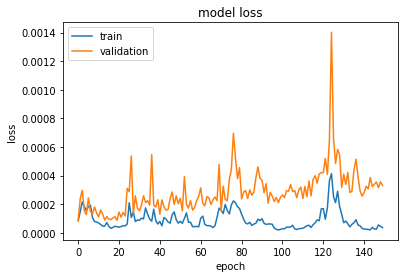

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
m.predict(X_test).T
m.summary()
print (m.predict(X_test).T)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_2 (Dense)              (None, 52)                2756      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 53        
Total params: 3,537
Trainable params: 3,537
Non-trainable params: 0
_________________________________________________________________
[[15.191292  26.184319  18.858414  11.2385645 19.306524  20.983541
  21.196686  23.115963  33.27062   22.943745  22.968948  12.298336
  21.161198  22.447659  30.976398  21.513058  17.48732   17.064495
  24.176914  26.761993  29.261198  36.880383  27.345043  27.953632
  26.03122   22.43996   31.309502  17.858633  12.481453  18.518967
  26.728611  22.703762  21.797882  12.211319   

In [21]:
#output = (Y_test)
#print(output)
#np.sqrt(np.sum((m.predict(X_test).T -output)**2))

## references

https://keras.io/models/about-keras-models/
    
python 

test git desktop
    